Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.52
Test Set Accuracy: 0.47


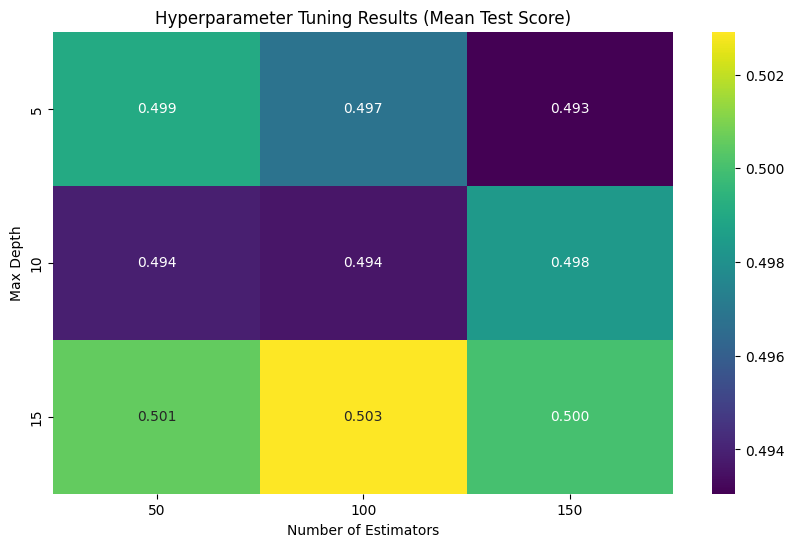

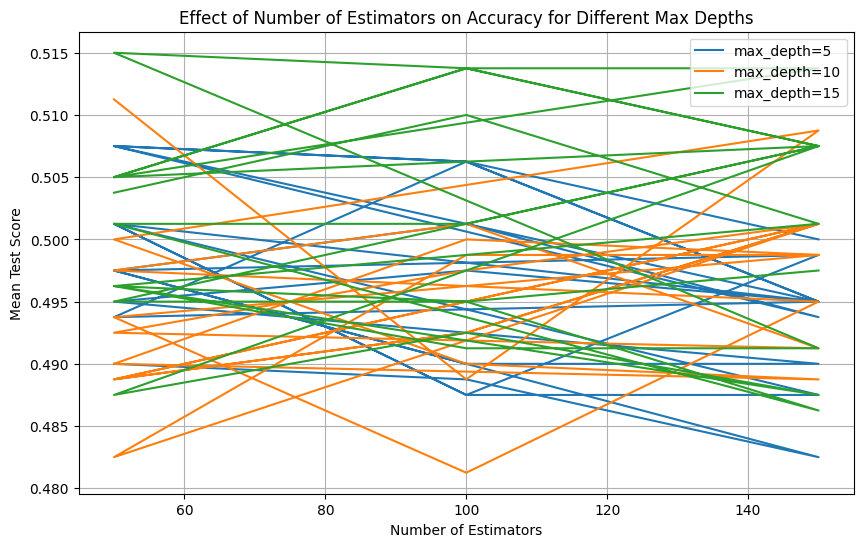

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a simplified version of the Titanic dataset
np.random.seed(42)

data = {
    'Pclass': np.random.choice([1, 2, 3], size=1000),  # Passenger class
    'Sex': np.random.choice(['male', 'female'], size=1000),  # Sex
    'Age': np.random.randint(1, 80, size=1000),  # Age in years
    'SibSp': np.random.randint(0, 5, size=1000),  # Number of siblings/spouses aboard
    'Parch': np.random.randint(0, 5, size=1000),  # Number of parents/children aboard
    'Fare': np.random.uniform(10, 100, size=1000),  # Passenger fare
    'Survived': np.random.choice([0, 1], size=1000)  # Target variable (0 = No, 1 = Yes)
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Encoding categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Splitting dataset into features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up RandomForest model
model = RandomForestClassifier(random_state=42)

# Hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [5, 10, 15],         # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples at a leaf node
}

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fitting the model
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

# Predicting on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Accuracy on test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.2f}")

# Visual Representation of Hyperparameter Tuning Results
results = pd.DataFrame(grid_search.cv_results_)

# Plotting heatmap for 'n_estimators' vs 'max_depth'
pivot_table = results.pivot_table(values='mean_test_score', index='param_max_depth', columns='param_n_estimators')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".3f")
plt.title('Hyperparameter Tuning Results (Mean Test Score)')
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.show()

# Line plot to show the impact of different 'n_estimators' values on accuracy
plt.figure(figsize=(10, 6))
for depth in param_grid['max_depth']:
    subset = results[results['param_max_depth'] == depth]
    plt.plot(subset['param_n_estimators'], subset['mean_test_score'], label=f'max_depth={depth}')

plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.title('Effect of Number of Estimators on Accuracy for Different Max Depths')
plt.legend()
plt.grid()
plt.show()
